In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta.tsv"
sample_names = "Control,Flt3l,Input"
min_cell = 10

In [2]:
sample_names = sample_names.split(",")
sample_names

['Control', 'Flt3l', 'Input']

In [3]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
%matplotlib inline

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name
Control_AAACGAAAGAATCAGT-1,Control,1972,1972,6432,1259,31,19,266,1066,3791,...,6,6,2211,1942,AAACGAAAGAATCAGT-1_Control,Control_AAACGAAAGAATCAGT-1,4,1,Control,1_4
Control_AAACGAAAGCATACCT-1,Control,2674,2674,11858,1937,51,34,549,3102,6185,...,7,7,3311,2750,AAACGAAAGCATACCT-1_Control,Control_AAACGAAAGCATACCT-1,30,1,Control,1_30
Control_AAACGAAAGCGAGAAA-1,Control,1939,1939,7365,1097,25,27,275,2184,3757,...,7,7,2112,1838,AAACGAAAGCGAGAAA-1_Control,Control_AAACGAAAGCGAGAAA-1,15,0,Control,0_15
Control_AAACGAAAGTACAGAT-1,Control,862,862,4095,861,16,16,230,771,2201,...,4,4,1441,1317,AAACGAAAGTACAGAT-1_Control,Control_AAACGAAAGTACAGAT-1,9,0,Control,0_9
Control_AAACGAAAGTACAGTA-1,Control,1775,1775,8088,1091,27,27,369,2157,4417,...,6,6,2385,2085,AAACGAAAGTACAGTA-1_Control,Control_AAACGAAAGTACAGTA-1,17,1,Control,1_17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3585,3585,17067,3257,63,80,461,8097,5109,...,3,3,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,6,0,Input,0_6
Input_TTTGTGTTCCTGAAAC-1,Input,4362,4362,30427,8323,84,99,799,12146,8976,...,11,11,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,11,0,Input,0_11
Input_TTTGTGTTCGGGAAAC-1,Input,8047,8047,40114,14032,169,160,1561,10102,14090,...,3,3,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,37,0,Input,0_37
Input_TTTGTGTTCGGGACAA-1,Input,3303,3303,22721,4421,43,84,546,11692,5935,...,4,4,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,3,1,Input,1_3


In [6]:
group_counts = se_cells_meta.groupby(["condition", "donor"]).size()
group_counts

condition  donor
Control    0        1957
           1        2495
Flt3l      0        3290
           1        2947
Input      0        3413
           1        2537
None       None     2033
dtype: int64

### Remove None before normalizing

In [7]:
def plots(df, name):
    f, ax =plt.subplots(figsize=(10,10))
    df[["ncells"]].plot.bar(ax=ax)
    plt.savefig(join(outdir, name+".barplot.png"))
    
    f, ax =plt.subplots(figsize=(12,12))
    df.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax)
    plt.savefig(join(outdir, name+".barplot_conditions.png"))
    
    

    cultured_inds = set(df.columns.values) - {"Input", "ncells","donor"}
    df["cultured"] = df[cultured_inds].sum(axis=1)

    
    f,ax = plt.subplots(ncols=2,figsize=(16,16))
    if "Input" in df.columns:
        sns.scatterplot(data=df, x="Input", y="cultured",hue="donor",ax=ax[0])
    
    if len(sample_names) > 1:
        sns.scatterplot(data=df, x=sample_names[0], y=sample_names[1], hue="donor", ax=ax[1] )
    else:
        # Just remake the old plot just in case
        df.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax[1])
        
    ax[0].set_box_aspect(1)
    ax[1].set_box_aspect(1)
    
    plt.savefig(join(outdir, name+".conditionScatter.png"))
    return

In [8]:
clone_counts = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=10]


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


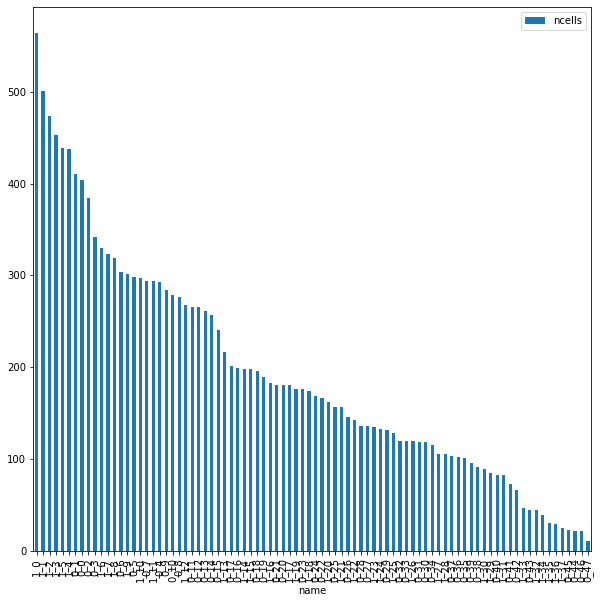

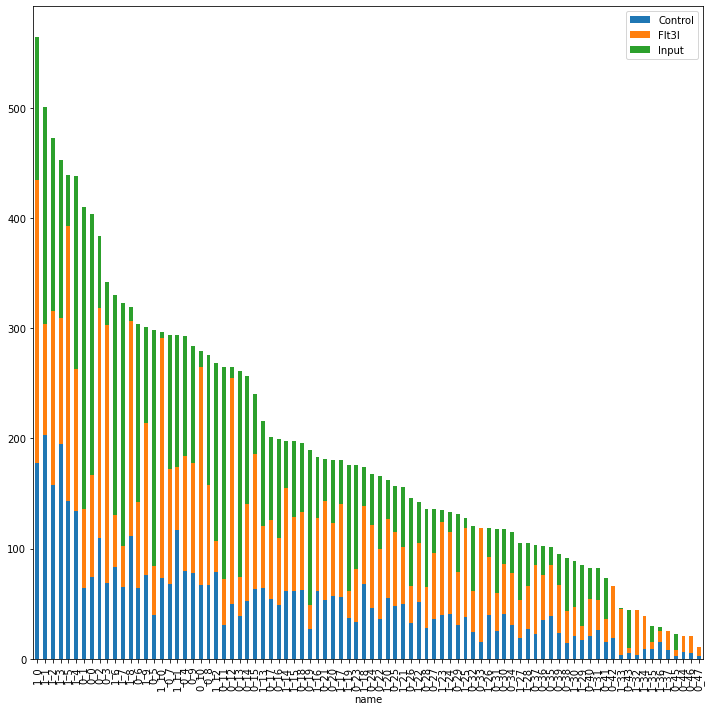

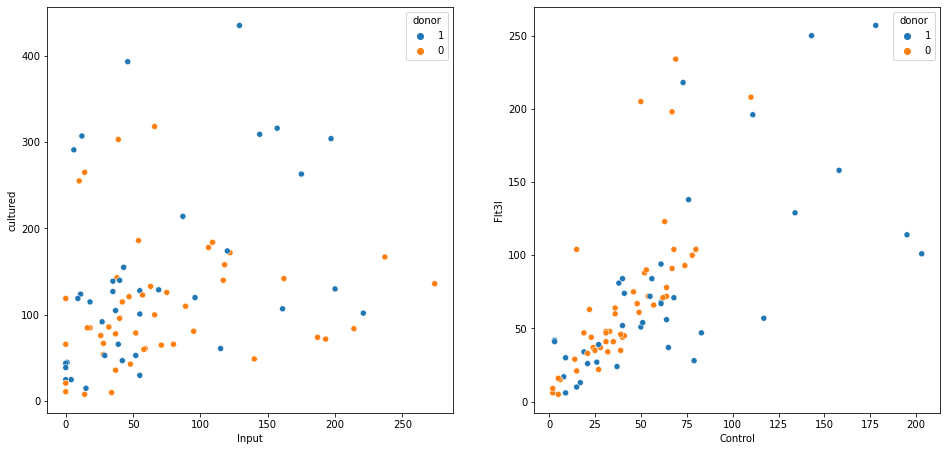

In [9]:
%matplotlib inline
plots(clone_counts_filt_10_df,
      name="clone_counts")

# Normalize

In [10]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/group_counts.loc[(x["condition"], x["donor"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["condition", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df




sum of normed values condition  donor
Control    0        1.0
           1        1.0
Flt3l      0        1.0
           1        1.0
Input      0        1.0
           1        1.0
Name: ncells, dtype: float64


,donor,ncells,Control,Flt3l,Input
name,,,,,
1_0,1,0.209397,0.071343,0.087207,0.050847
1_1,1,0.193286,0.081363,0.034272,0.077651
1_2,1,0.178825,0.063327,0.053614,0.061884
1_3,1,0.173600,0.078156,0.038683,0.056760
1_4,1,0.166460,0.053707,0.043773,0.068979
...,...,...,...,...,...
0_45,0,0.006948,0.001022,0.001824,0.004102
0_47,0,0.003758,0.001022,0.002736,0.000000
0_48,0,0.002639,0.000511,0.002128,0.000000


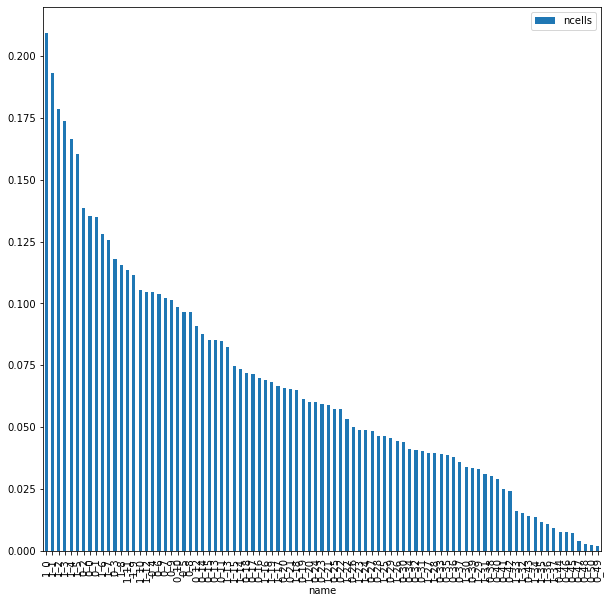

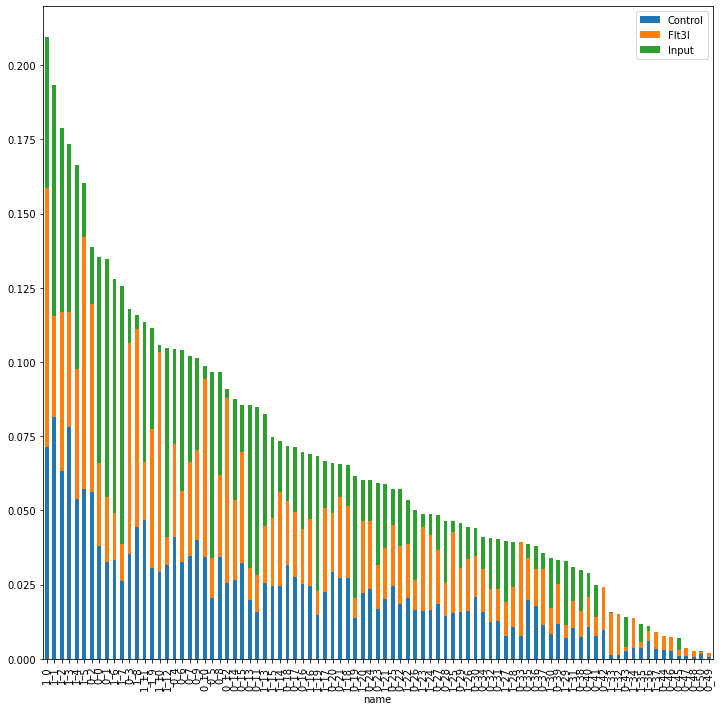

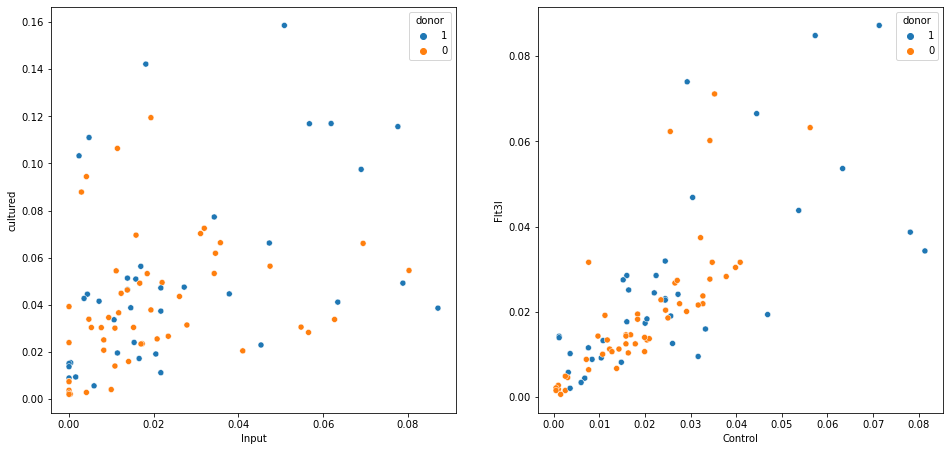

In [11]:
plots(clone_norm_df,
      name="normalized_counts")

## Only top clones

In [12]:
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

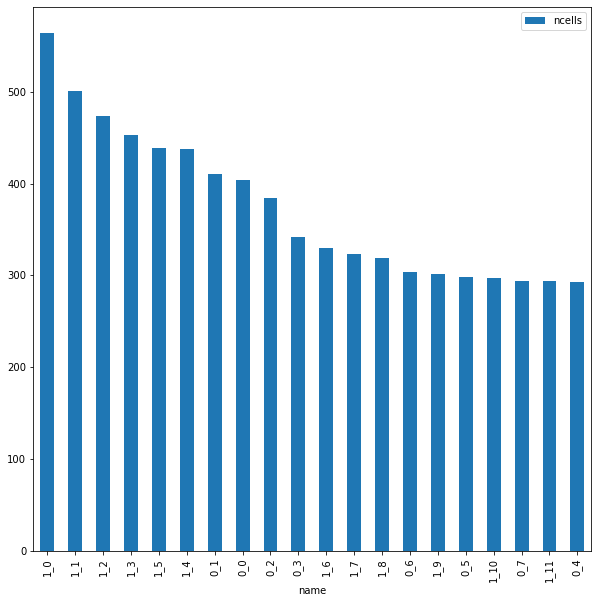

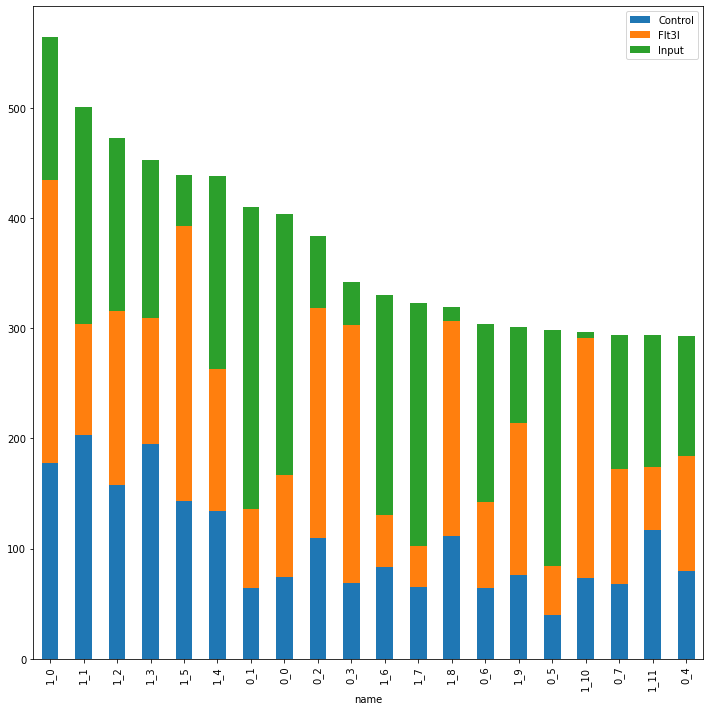

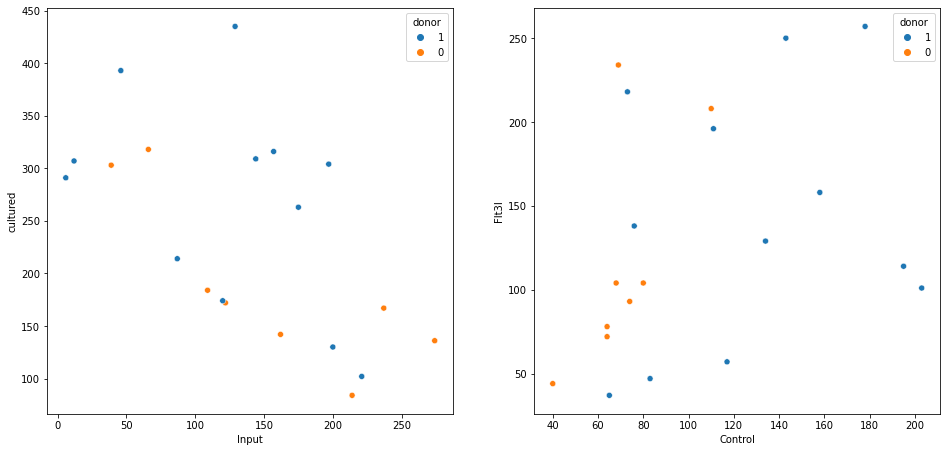

In [13]:
plots(keep_top_clones(clone_counts_filt_10_df.drop("cultured",axis=1), n_top=20, min_cell=min_cell),
      name=f"top20_minCell{min_cell}_clone_counts")

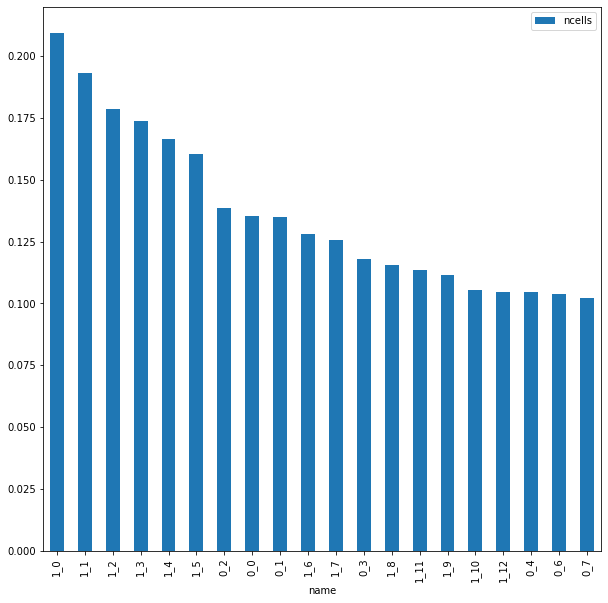

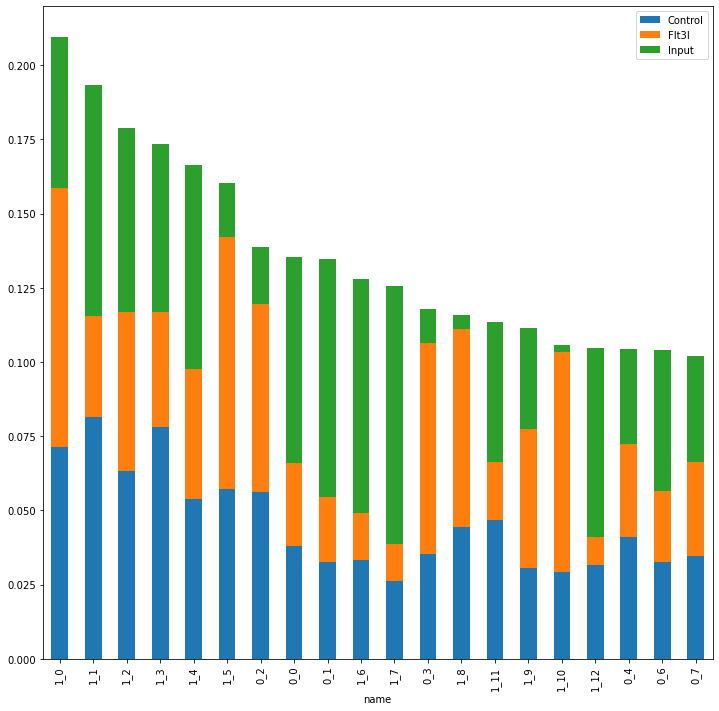

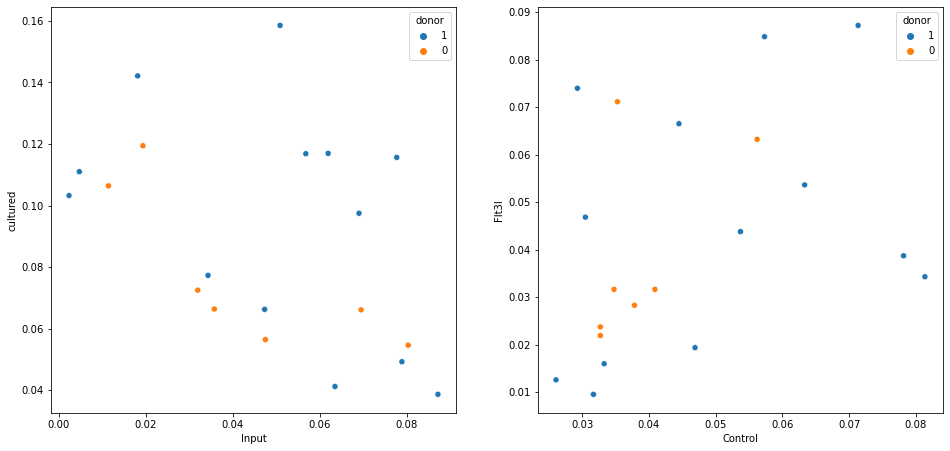

In [14]:
plots(keep_top_clones(clone_norm_df.loc[cell_25].drop("cultured",axis=1), n_top=20, min_cell=0),
     name=f"top20_minCell{min_cell}_clone_normalized_counts")

In [15]:
outdir

'/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/'

## Split by donors

0
1


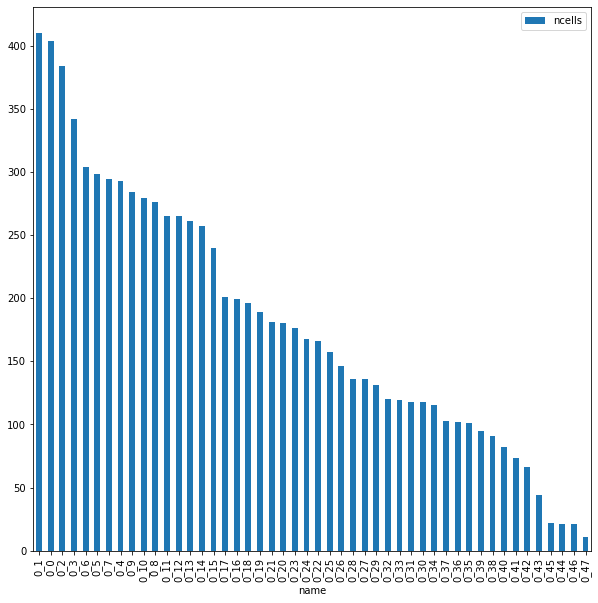

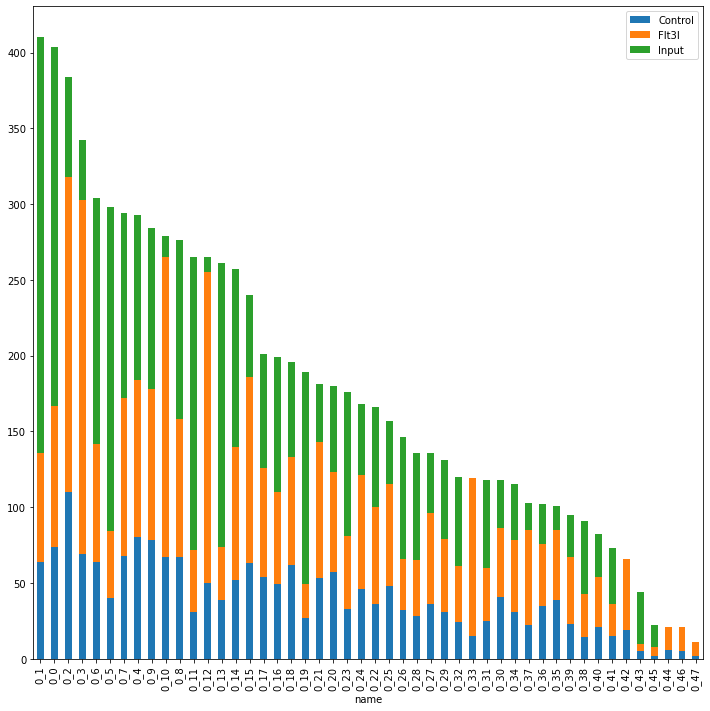

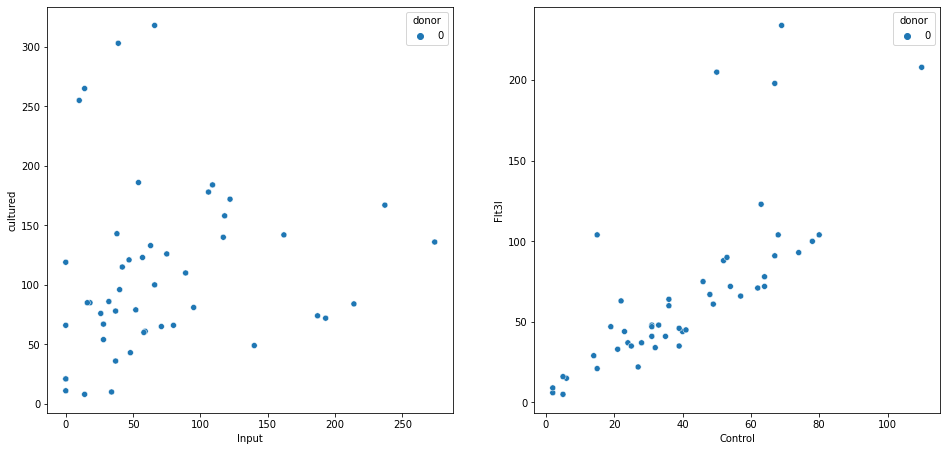

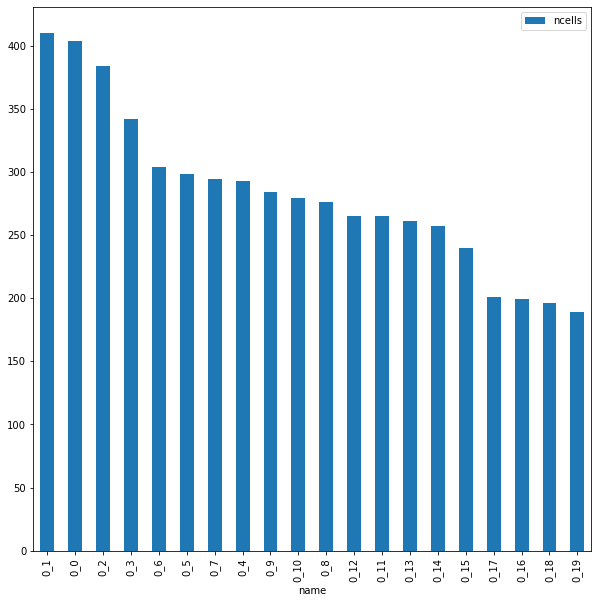

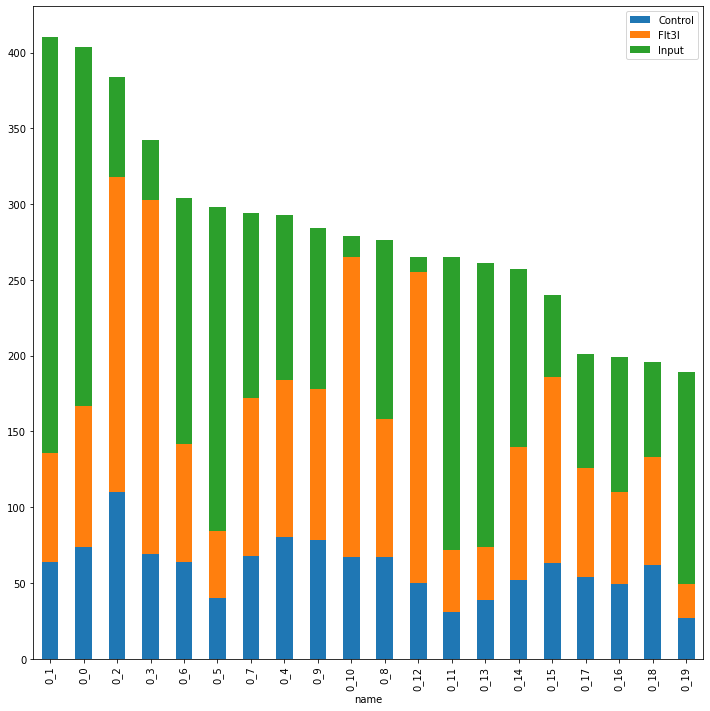

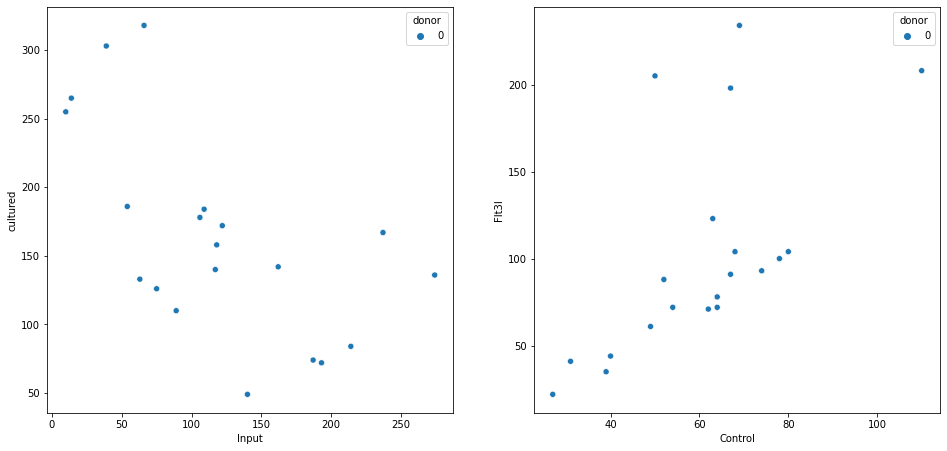

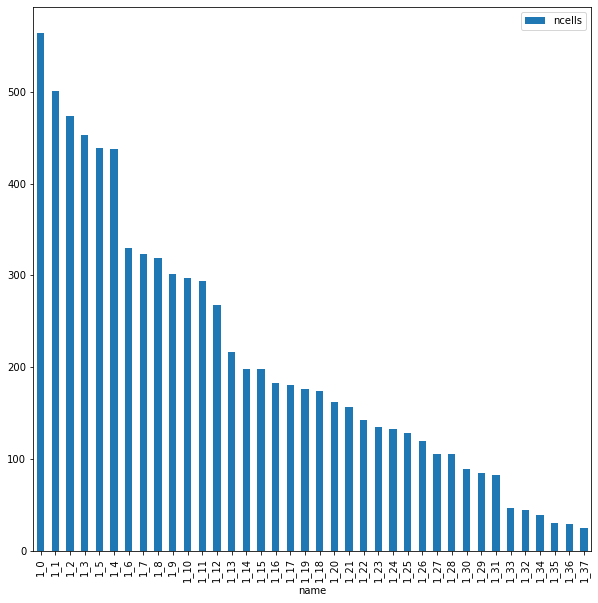

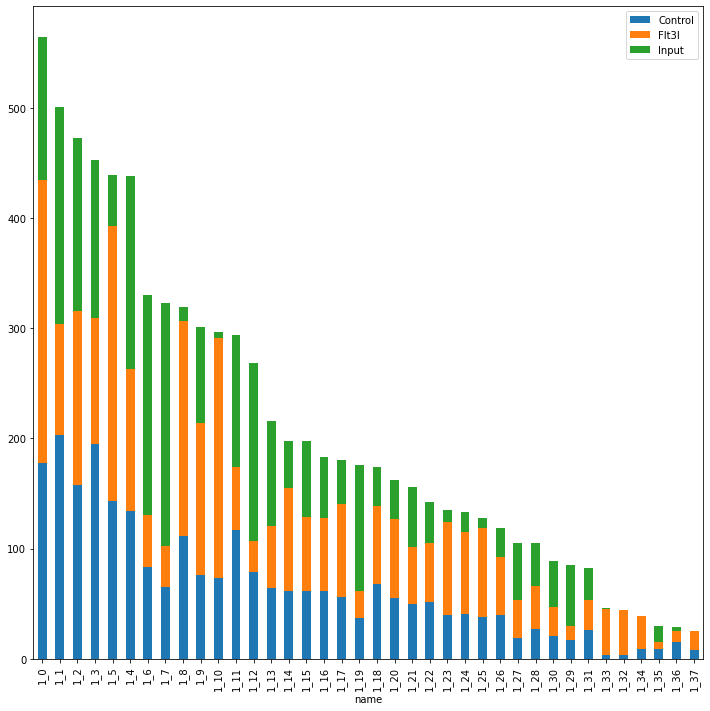

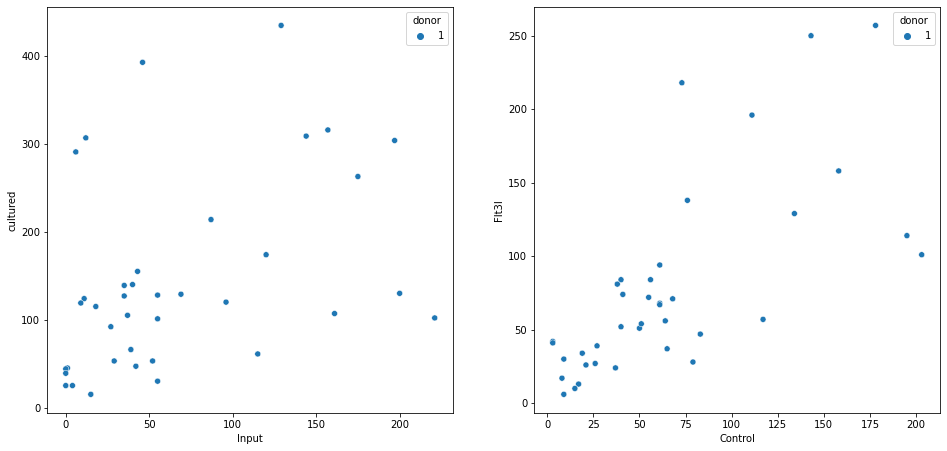

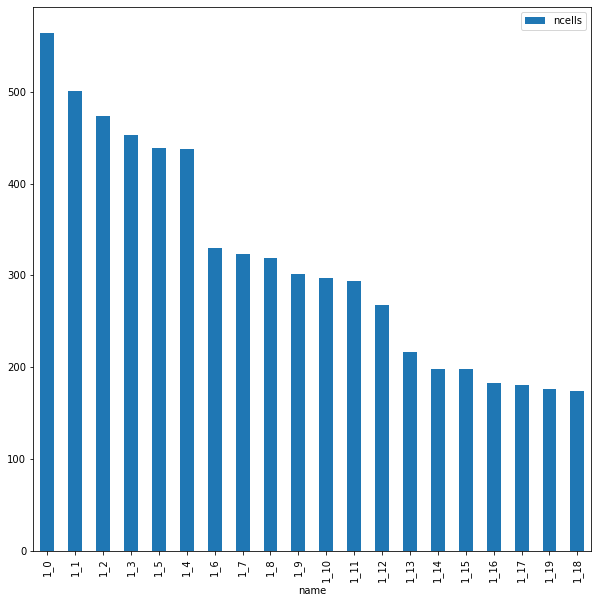

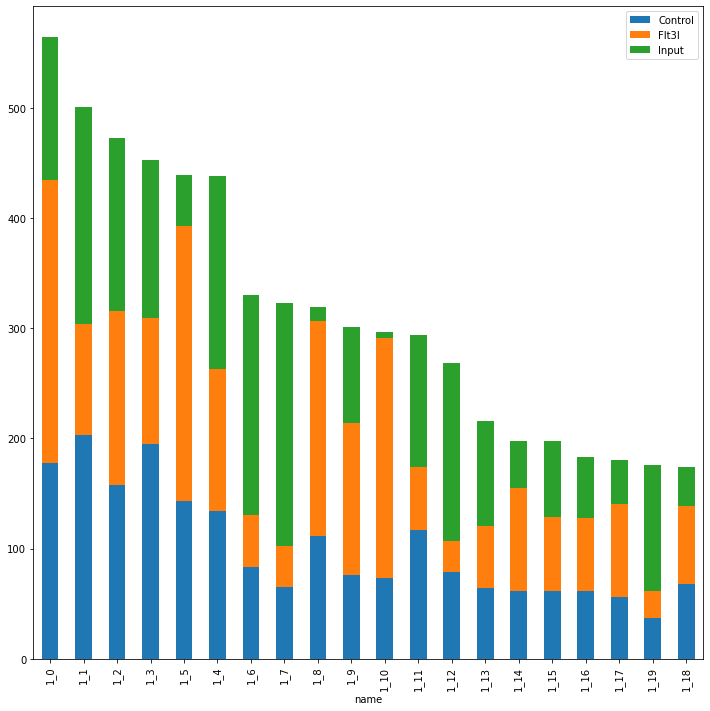

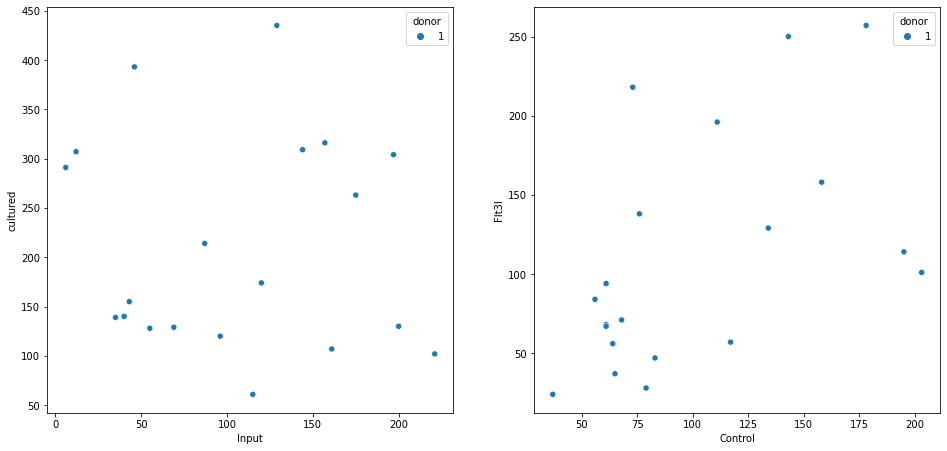

In [21]:
for d, curr_df in clone_counts_filt_10_df.groupby("donor"):
    print(d)
    plots(curr_df.drop("cultured",axis=1),
      name=f"donor{d}.clone_counts")
    plots(keep_top_clones(curr_df.drop("cultured",axis=1), n_top=20, min_cell=min_cell),
      name=f"donor{d}.top20_minCell{min_cell}_clone_counts")